# Calibrated data from BioLector I

In [1]:
import numpy
import pandas
import pathlib
import matplotlib.cm
from matplotlib import pyplot

import bletl

### Extract the raw data file

In [2]:
filepath = pathlib.Path('..', 'bletl', 'data', 'BL1', 'NT_1200rpm_30C_DO-GFP75-pH-BS10_12min_20171221_121339.csv')

bldata = bletl.parse(filepath)

### Apply calibration parameters

In [7]:
calibration_parameters = {
    'cal_0': 65.91,
    'cal_100': 40.60,
    'phi_min': 57.45,
    'phi_max': 18.99,
    'pH_0': 6.46,
    'dpH': 0.56,
}

bldata.calibrate(calibration_parameters)
bldata.calibrated_data

{'DO': <bletl.core.FilterTimeSeries at 0x245e2a13668>,
 'GFP75': <bletl.core.FilterTimeSeries at 0x245e562c2b0>,
 'pH': <bletl.core.FilterTimeSeries at 0x245e5612c18>,
 'BS10': <bletl.core.FilterTimeSeries at 0x245e562c160>}

As shown in the output above, the `bldata` object now has a `calibrated_data` property that is a dictionary mapping names of the filtersets to `FilterTimeSeries` objects.

The `FilterTimeSeries` objects have two relevant properties: `value` and `time`.  Both are `DataFrame`s with the same column headings and number of rows.  The `time` property contains the exact time of measurement for each reading in the `values` table.

For simplicity, this example uses the same time for all readings in a cycle.

In [8]:
BS = bldata.calibrated_data['BS10'].value
pH = bldata.calibrated_data['pH'].value
DO = bldata.calibrated_data['DO'].value
time = bldata.calibrated_data['BS10'].time['A01']

In [9]:
BS.head()

well,A01,A02,A03,A04,A05,A06,A07,A08,B01,B02,...,E07,E08,F01,F02,F03,F04,F05,F06,F07,F08
cycle,,,,,,,,,,,,,,,,,,,,,
1,11.786574,10.662952,11.259160,11.121573,11.213297,10.655308,10.456572,10.456572,11.159792,11.358528,...,10.938125,10.724101,11.045136,11.159792,10.846400,11.817149,12.291058,10.555940,10.693526,10.831113
2,12.167130,10.903709,11.278907,11.470334,11.102793,10.467254,10.520854,10.582111,11.309535,10.972623,...,10.911366,10.811824,10.888395,10.957308,10.949651,11.271250,11.914446,10.719938,10.964966,11.010908
3,12.210841,10.925894,11.572215,11.072086,11.010531,11.049003,10.548874,10.748925,11.395246,11.302914,...,10.972060,10.987448,11.202889,11.095169,11.225971,11.456800,12.010789,10.787397,11.095169,10.748925
4,12.474002,11.176397,11.500798,11.477627,11.485351,10.720690,10.720690,10.898339,11.500798,11.284531,...,11.238188,11.106882,10.975577,11.269083,11.145502,11.647551,12.350421,10.836548,11.245912,11.045092
5,11.918877,10.974041,11.663306,11.717518,11.430970,11.012763,10.888850,11.020508,11.856920,11.477437,...,11.430970,11.229611,11.523904,11.299312,11.763986,11.895643,12.197681,10.927573,11.779475,11.214122


In the cell above, we defined variables `BS`, `pH`, `DO`, and `time` for easier access to the data of interest.  These `DataFrame`s can directly be sliced by the well ids.

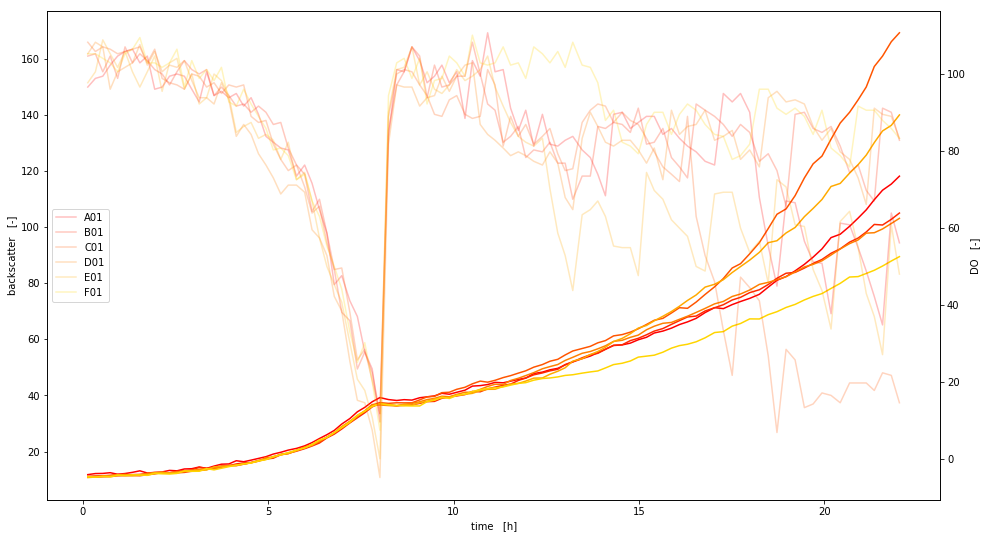

In [10]:
#wells = [f'A0{c}' for c in range(1, 7)]
wells = [f'{r}01' for r in 'ABCDEF']

fig, ax = pyplot.subplots(figsize=(16,9))
ax2 = ax.twinx()
for w, well in enumerate(wells):
    color = matplotlib.cm.autumn(w / len(wells))
    ax.plot(time, BS[well], label=well, color=color)
    ax2.plot(time, DO[well], label=well, linestyle='-', alpha=.25, color=color)
ax.set_xlabel('time   [h]')
ax.set_ylabel('backscatter   [-]')
ax2.set_ylabel('DO   [-]')
pyplot.legend(loc='center left')
pyplot.show()

### Apply biomass calibration curve